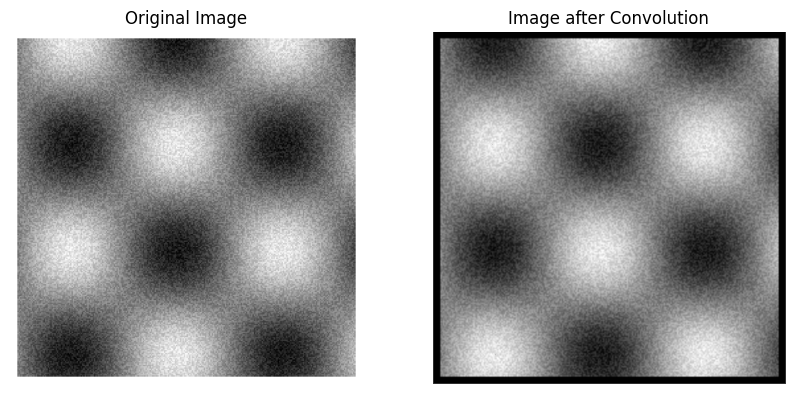

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Load and convert the image to grayscale
def load_grayscale_image(image_path):
    """
    Loads an image, converts it to grayscale, and returns it as a NumPy array.
    """
    img = Image.open(image_path).convert("L")  # Convert to grayscale
    return np.array(img)

# Define a 3x3 convolution kernel
def create_kernel():
    """
    Returns a predefined 3x3 convolution kernel.
    """
    return np.array([
        [0, -0.5, 0],
        [-0.5, 1, -0.5],
        [0, -0.5, 0]
    ])

# Apply 2D convolution to an image
def apply_convolution(image, kernel):
    """
    Applies a 2D convolution operation using a given kernel.
    Zero-padding is applied to maintain the original image size.
    """
    padded_image = np.pad(image, pad_width=1, mode='constant', constant_values=0)
    output = np.zeros_like(image)

    # Perform the convolution
    rows, cols = image.shape
    for i in range(rows):
        for j in range(cols):
            output[i, j] = np.sum(padded_image[i:i+3, j:j+3] * kernel)

    return output

# Display original and processed images side by side
def display_images(original, processed):
    """
    Displays the original and the convolved images side by side.
    """
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))

    axes[0].imshow(original, cmap='gray')
    axes[0].set_title("Original Image")
    axes[0].axis("off")

    axes[1].imshow(processed, cmap='gray')
    axes[1].set_title("Image after Convolution")
    axes[1].axis("off")

    plt.show()

# Main execution block
if __name__ == "__main__":
    image_path = "output.png"  # Provide the path to your image
    img_array = load_grayscale_image(image_path)
    kernel = create_kernel()

    processed_img = apply_convolution(img_array, kernel)

    display_images(img_array, processed_img)


In [3]:
import numpy as np
import scipy.io as sio

def load_data(file_path):
    mat = sio.loadmat(file_path)
    X = mat['X']
    D = mat['D']
    return mat['X'], mat['D']


# Compute optimal weight using the normal equation
def compute_optimal_weight(X, D):
    return np.linalg.inv(X.T @ X) @ X.T @ D

def evaluate_model(X, W, D):
    predictions = X @ W
    mse = np.mean((D - predictions) ** 2)
    return predictions, mse

# Main execution
if __name__ == "__main__":
    file_path = "./dataset.mat"  
    data, target = load_data(file_path) 
    
    W_star = compute_optimal_weight(data, target)  
    print("Optimal Weight W*:\n", W_star)
    
    predictions, mse = evaluate_model(data, W_star, target) 
    print("Mean Squared Error:", mse)


Optimal Weight W*:
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
 [[ 1.0006781 ]
 [ 1.00061145]
 [-2.00031968]]
Mean Squared Error: 0.00010079903131736744


In [4]:
# Compute Mean Squared Error (MSE) loss with optimal weight
def compute_mse_loss(X, W_star, D):
    """
    Calculates the Mean Squared Error (MSE) loss using the formula:
        MSE = (1 / (2 * N)) * (D - XW)^T (D - XW)
    where:
        - X is the feature matrix
        - W_star is the optimal weight
        - D is the target values
        - N is the number of samples
    """
    mat = sio.loadmat(file_path)
    X = mat['X']
    D = mat['D']
    residuals = D - (X @ W_star)  # Compute residuals (D - XW)
    mse_loss = (residuals.T @ residuals) / (2 * D.shape[0])  # Compute MSE loss
    return mse_loss[0, 0]  # Extract scalar value

# Compute and print MSE loss
mat = sio.loadmat(file_path)
X = mat['X']
D = mat['D']
min_loss = compute_mse_loss(X, W_star, D)
print(f"The MSE loss with optimal weight is {min_loss:.6f}")



The MSE loss with optimal weight is 0.000050


In [5]:
import numpy as np
import scipy.io as sio

def load_data(file_path):
    mat = sio.loadmat(file_path)
    return mat['X'], mat['D']

# Compute optimal weight using the normal equation
def compute_optimal_weight(X, D):
    return np.linalg.inv(X.T @ X) @ X.T @ D

def evaluate_model(X, W, D):
    predictions = X @ W
    mse = np.mean((D - predictions) ** 2)
    return predictions, mse

# Compute Mean Squared Error (MSE) loss with optimal weight
def compute_mse_loss(X, W_star, D):
   
    residuals = D - (X @ W_star)  # Compute residuals (D - XW)
    mse_loss = (residuals.T @ residuals) / (2 * D.shape[0])  # Compute MSE loss
    return mse_loss[0, 0]  # Extract scalar value

# Main execution
if __name__ == "__main__":
    file_path = "./dataset.mat"  
    X, D = load_data(file_path)  # Load data and target
    
    W_star = compute_optimal_weight(X, D)  # Compute optimal weight
    print("Optimal Weight W*:\n", W_star)
    
    predictions, mse = evaluate_model(X, W_star, D)  # Evaluate model
    print("Mean Squared Error:", mse)
    
    # Compute and print MSE loss
    min_loss = compute_mse_loss(X, W_star, D)
    print(f"The MSE loss with optimal weight is {min_loss:.6f}")

Optimal Weight W*:
 [[ 1.0006781 ]
 [ 1.00061145]
 [-2.00031968]]
Mean Squared Error: 0.00010079903131736744
The MSE loss with optimal weight is 0.000050
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


Final Weights: [ 1.00074855  1.00082859 -2.00068123]


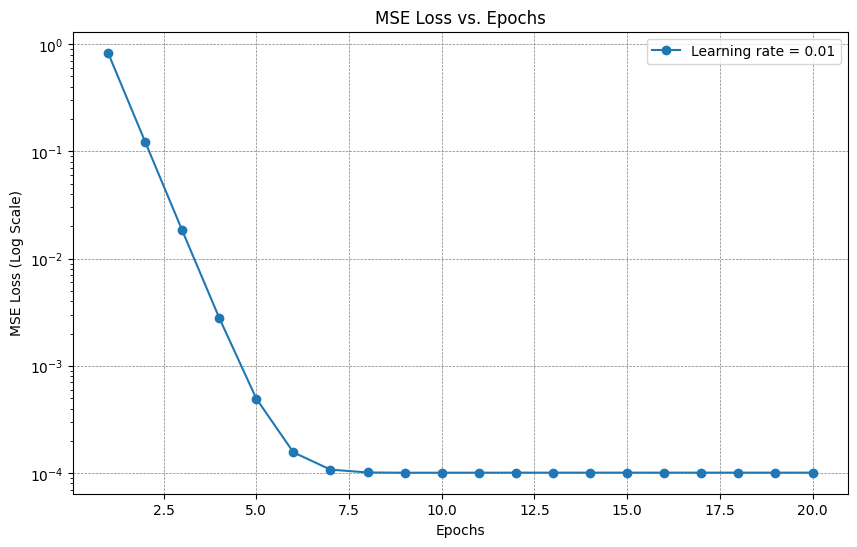

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Initialize model parameters
def initialize_weights(n_features):
    """
    Initializes the weight matrix with zeros.
    """
    return np.zeros((n_features, 1))

# Least Mean Squares (LMS) Training Algorithm
def train_lms(X, D, learning_rate=0.01, epochs=20):
    """
    Trains the LMS algorithm with a given learning rate and epochs.

    Parameters:
    - X: Feature matrix (shape: [num_samples, num_features])
    - D: Target values (shape: [num_samples, 1])
    - learning_rate: Step size for gradient updates
    - epochs: Number of iterations over the entire dataset

    Returns:
    - W: Optimized weight matrix
    - mse_list: List of Mean Squared Errors per epoch
    """
    n_samples, n_features = X.shape
    W = initialize_weights(n_features)
    mse_list = []

    # Training loop
    for epoch in range(epochs):
        for i in range(n_samples):
            X_i = X[i].reshape(1, -1)  # Shape (1, n_features)
            D_i = D[i]  # Scalar target value

            # Prediction
            y_pred = np.dot(X_i, W)  # Shape (1,1)

            # LMS Weight Update Rule
            W += learning_rate * (D_i - y_pred) * X_i.T  # Shape (n_features, 1)

        # Compute MSE for entire dataset
        y_preds = np.dot(X, W)  # Predictions for all samples
        mse = np.mean((D - y_preds) ** 2)
        mse_list.append(mse)

    return W, mse_list

# Function to plot MSE loss
def plot_mse_loss(mse_list, epochs, learning_rate):
    """
    Plots the Mean Squared Error loss over epochs in a log scale.
    """
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, epochs + 1), mse_list, marker="o", label=f"Learning rate = {learning_rate}")

    plt.xlabel("Epochs")
    plt.ylabel("MSE Loss (Log Scale)")
    plt.yscale("log")
    plt.title("MSE Loss vs. Epochs")
    plt.grid(color="gray", linestyle="--", linewidth=0.5)
    plt.legend()
    plt.show()

# Main Execution
if __name__ == "__main__":
    # Assume X and D are already defined elsewhere
    n_features = 3  # Example feature size (should be set based on dataset)

    # Train LMS Model
    W_final, mse_list = train_lms(X, D, learning_rate=0.01, epochs=20)

    # Print Final Weights
    print("Final Weights:", W_final.flatten())

    # Plot MSE Loss
    plot_mse_loss(mse_list, epochs=20, learning_rate=0.01)


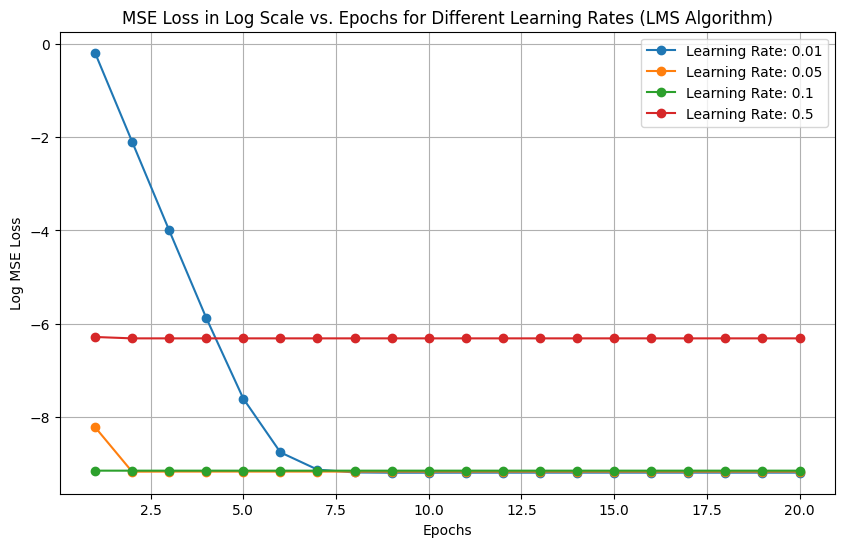

In [8]:
learning_rates = [0.01, 0.05, 0.1, 0.5]
epochs = 20
mse_dict = {}  

# Loop through each learning rate
for r in learning_rates:
    W = np.zeros((3, 1))  
    mse_list = []  
    
    for epoch in range(epochs):
        for i in range(X.shape[0]):  
            X_i = X[i].reshape(1, -1) 
            D_i = D[i]  

            y_pred = np.dot(X_i, W)  # Shape (1,1)

            error = D_i - y_pred

            W = W + r * error * X_i.T  # Shape (3,1)

        y_preds = np.dot(X, W)  
        mse = np.mean((D - y_preds) ** 2)  # Mean squared error
        mse_list.append(mse)

    mse_dict[r] = mse_list  

plt.figure(figsize=(10, 6))

for r in learning_rates:
    plt.plot(range(1, epochs + 1), np.log(mse_dict[r]), marker="o", label=f"Learning Rate: {r}")

plt.title("MSE Loss in Log Scale vs. Epochs for Different Learning Rates (LMS Algorithm)")
plt.xlabel("Epochs")
plt.ylabel("Log MSE Loss")
plt.legend()
plt.grid(True)
plt.show()


In [9]:
import torch

# 检查 PyTorch 是否安装成功
print(torch.__version__)

# 检查是否支持 GPU
print(torch.cuda.is_available())

2.2.2
False
